In [8]:
import pandas as pd 
import numpy as np
import matplotlib as mp

In [10]:
df = pd.read_csv(r"D:\Data Analyst Project\ADA-USD.csv")

In [12]:
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,ADA-USD,ADA-USD,ADA-USD,ADA-USD,ADA-USD
1,Date,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,0.04254699870944023,0.04254699870944023,0.04030799865722656,0.04098400101065636,14962902
3,2019-01-02,0.04525800049304962,0.045563001185655594,0.04198199883103371,0.04256799817085266,24151526
4,2019-01-03,0.04268199950456619,0.04525899887084961,0.042534999549388885,0.04510600119829178,21126963


In [14]:
df = df.drop([0,1]).reset_index(drop=True)
df.head()

,Price,Close,High,Low,Open,Volume
0,2019-01-01,0.04254699870944023,0.04254699870944023,0.04030799865722656,0.04098400101065636,14962902
1,2019-01-02,0.04525800049304962,0.045563001185655594,0.04198199883103371,0.04256799817085266,24151526
2,2019-01-03,0.04268199950456619,0.04525899887084961,0.042534999549388885,0.04510600119829178,21126963
3,2019-01-04,0.04381199926137924,0.044091999530792236,0.04247700050473213,0.042628999799489975,16024029
4,2019-01-05,0.044700998812913895,0.045570001006126404,0.04334999993443489,0.04365900158882141,25100965


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604 entries, 0 to 2603
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   2604 non-null   object
 1   Close   2604 non-null   object
 2   High    2604 non-null   object
 3   Low     2604 non-null   object
 4   Open    2604 non-null   object
 5   Volume  2604 non-null   object
dtypes: object(6)
memory usage: 122.2+ KB


In [18]:
df.nunique()

Price     2604
Close     2601
High      2599
Low       2596
Open      2596
Volume    2604
dtype: int64

In [20]:
df.isnull().sum()

Price     0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [22]:
df.dtypes

Price     object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object

In [27]:
df['Price'] = pd.to_datetime(df['Price'])

In [29]:
df['High'] = pd.to_numeric(df['High'])
df['Low'] = pd.to_numeric(df['Low'])
df['Close'] = pd.to_numeric(df['Close'])
df['Open'] = pd.to_numeric(df['Open'])
df['Volume'] = pd.to_numeric(df['Volume'])

In [31]:
df.dtypes

Price     datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
dtype: object

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df.set_index(df['Price'], inplace= True)

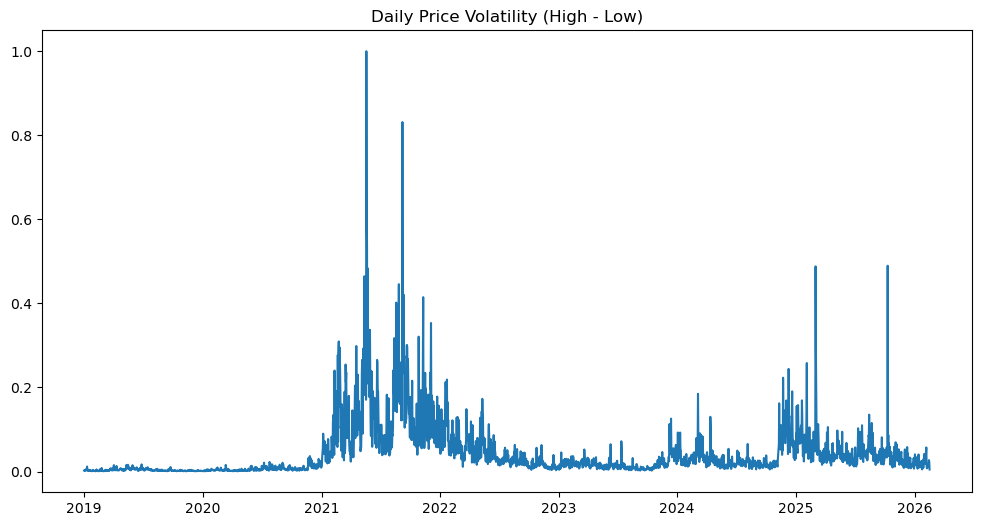

In [39]:
df['Spread'] = df['High'] - df['Low']
plt.figure(figsize= (12,6))
plt.plot(df.index, df['Spread'])
plt.title("Daily Price Volatility (High - Low)")
plt.show()

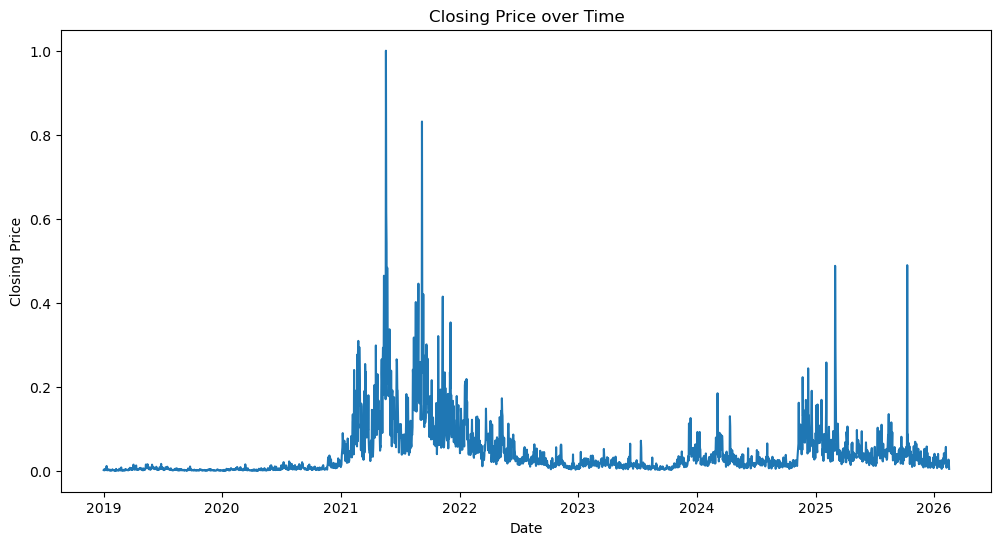

In [42]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Spread'])
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing Price over Time")
plt.show()

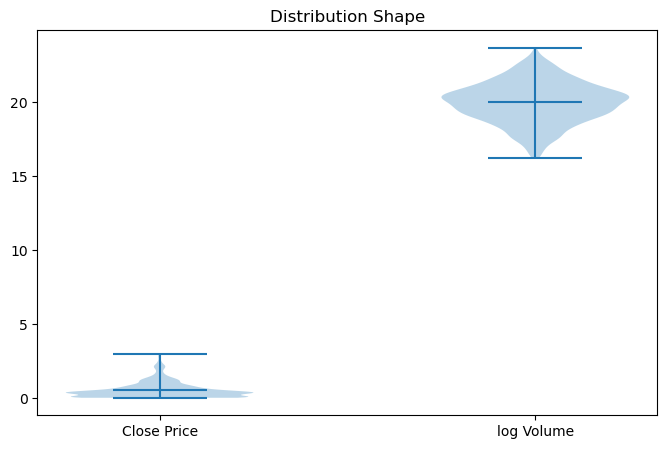

In [45]:
plt.figure(figsize = (8,5))
plt.violinplot([df['Close'], np.log(df['Volume'])], showmeans = True)
plt.xticks([1,2], ['Close Price', "log Volume"])

plt.title("Distribution Shape")
plt.show()

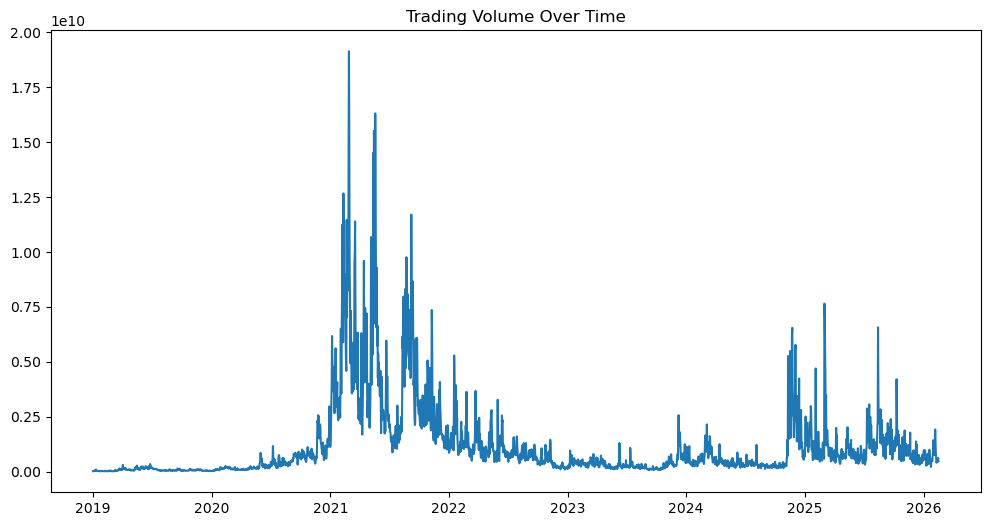

In [47]:
# Volume vs Price
plt.figure(figsize=(12,6))
plt.plot(df['Volume'])
plt.title("Trading Volume Over Time")
plt.show()

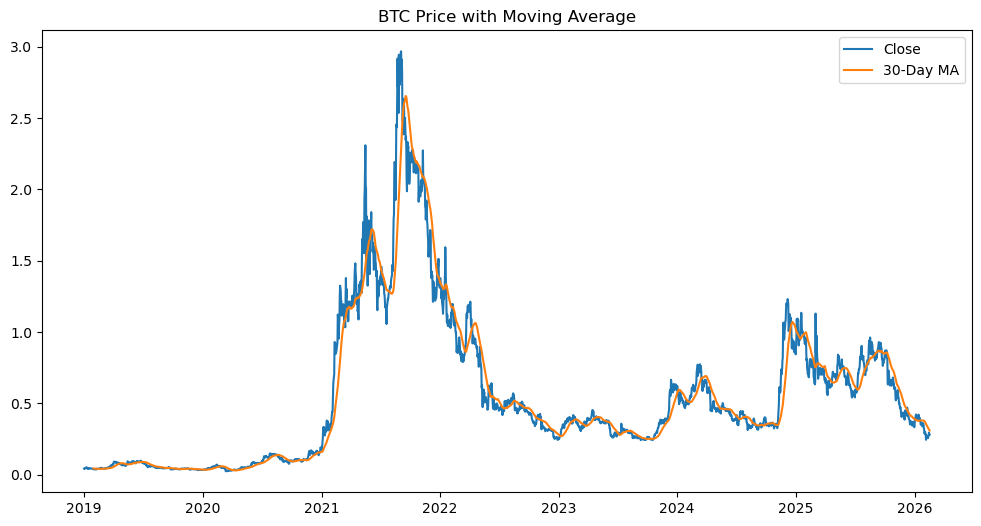

In [49]:
# Rolling Moving Average
df['MA30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close')
plt.plot(df['MA30'], label='30-Day MA')
plt.legend()
plt.title("BTC Price with Moving Average")
plt.show()

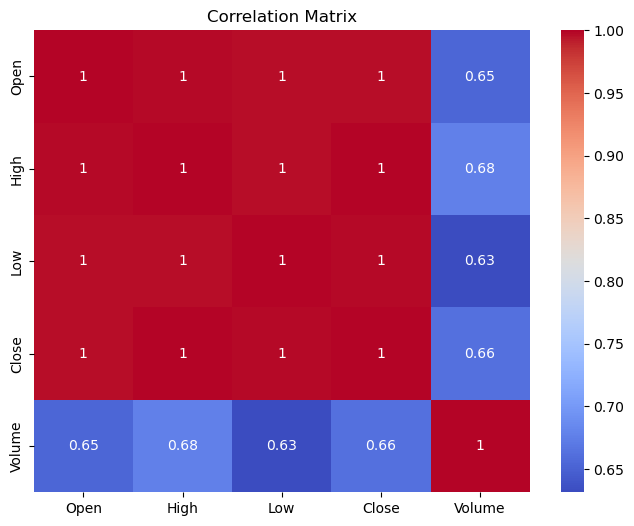

In [51]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Open','High','Low','Close','Volume']].corr(),
            annot=True,
            cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

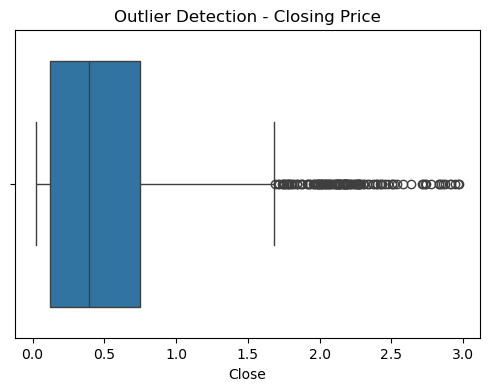

In [53]:
# Outlier Detection - Closing Price
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Close'])
plt.title("Outlier Detection - Closing Price")
plt.show()

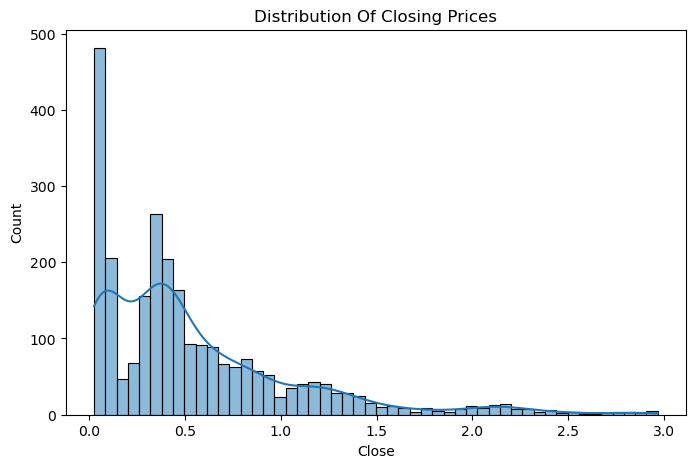

In [55]:
plt.figure(figsize=(8,5))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title("Distribution Of Closing Prices")
plt.show()